<a href="https://colab.research.google.com/github/ksm999/QuantumComputing/blob/main/_Grover's_Algorithm_%EC%B4%9D%EC%A0%95%EB%A6%AC_(matrix_%EC%9E%91%EC%84%B1%EC%A4%91).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grover's Algorithm

## Introduction
Grover's Algorithm 은 Quantum Mechanical phenomenon을 이용한 search algorithm 중 하나로 unstructed database or unstructed list를 탐색하는데 뛰어난 성능을 보인다. 기존의 Linear Search 나 Binary Search는 시간복잡도가 O(N)인데 반해 Glover's Algorithm은 O(sqrt(N)) 의 시간복잡도로 탐색을 수행할 수 있다.

Grover's Algorithm은 탐색하고자 하는 값을 찾기 위해 oracle 이라 불리는 함수로 탐색 조건을 설정한 다음, diffuser이라 불리는 함수를 통해 원하는 input값이 output으로 나올 확률을 높인다.

## Classical Search Algorithm vs. Quantum Search Algorithm

기존의 Classical Search Algorithm 의 경우 대표적으로 2개의 Search Algorithm이 있는데 이는 Linear Search Algorithm과 Binary Search Algorithm 이다.

먼저 Linear Search Algorithm의 시간복잡도를 아주 간단한 예시를 들어 설명하자면 다음과 같다.

In [16]:
N = 100
x = 0
for i in range(N):
  x += 1
  if i == 98:
    print(f'Find data for {x}  times')

Find data for 99  times


N개의 data가 주어진 list에서 원하는 값을 찾기 위해 순차적으로 data를 search 해 나간다.
최악의 경우 원하는 값이 list의 가장 마지막에 존재하게 되는데
이는 빅오 표기법으로 나타내면 O(N)이다.

다음으로 Binary Search Algorithm 인데 Binary Search Algorithm의 경우 list가 정렬되어 있는 경우에만 사용할 수 있다.
list의 중간값을 기준으로 더 큰 값 혹은 작은 값을 계속 탐색해나간다.
N개의 data가 있다고 가정한다면
첫번째 탐색을 하고 나면 중간값을 기준으로 절반으로 나뉘게 되어
N/2개의 data가 남게 된다.
두번째 탐색을 시작하면 N/2개의 data가 있는 list의 중간값을 기준으로 큰 값 혹은 작은 값들을 탐색하기 위해 또 절반으로 data를 나누게 된다.
따라서 두번째 탐색을 마치고 나면 N/4 개의 data가 남게 된다.
총 k번째 탐색을 하여 원하는 data를 찾게된다면 이는
N*(1/2)^k = 1 라고 나타낼 수 있고 N = 2^k 이 된다.
양변에 log2를 취하면 k=log_2(N)이 되어
Binary Search Algorithm의 시간 복잡도는 O(log_2(N))이 된다.

## Grover Algorithm's Structure

n = 2의 qubit을 가질 때, Grover's Algorithm 의 구조는 다음과 같다.

여기서 원하는 input state |w> = |10> 이라 가정한다.

In [ ]:
!pip install qiskit

In [ ]:
!pip install pylatexenc

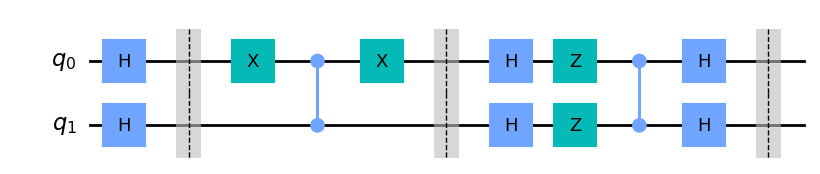

In [1]:
import qiskit
from qiskit import QuantumCircuit

n = 2

ga = QuantumCircuit(n)

ga.h([0,1]) # superposition
ga.barrier()

ga.x(0) # Oracle
ga.cz(0,1)
ga.x(0)
ga.barrier()

ga.h([0,1]) # Diffusion operator
ga.z([0,1])
ga.cz(0,1)
ga.h([0,1])
ga.barrier()

ga.draw('mpl')

1. 처음 두 개의 qubit을 H gate를 통해 중첩 상태로 만든다.
2. oracle을 통과하여 원하는 input state는 phase가 뒤집어진다.
3. Diffusion Operator를 통해 원하는 input 값이 output으로 나올 확률을 1이 되도록 높이고 다른 input 값이 나올 확률을 0에 가깝도록 낮춘다.
4. n 개의 qubit을 사용한다면 2.3 과정을 sqrt(2^n)번 반복한다.
5. 측정하여 output으로 원하는 input 값이 나오는지 확인한다.

#### 중첩된 state에서는 모든 state가 같은 확률을 가지고 있다.
#### oracle을 통해 원하는 input state의 크기는 같게 phase만을 negative로  뒤집어준다.
#### Diffusion Operator를 통과하게 되면 처음 중첩된 state를 기준으로 모든 state가 다시 뒤집어지게 된다.
#### 설명에 든 예시의 경우 n=2로 매우 ideal한 상황으로 이 과정을 한번만 거쳐도 원하는 input state를 제외한 다른 state들은 0으로 바로 수렴하여 원하는 input state가 나오게 되는데 실제로 n>>1로 매우 많은 state가 존재하는 경우에는 원하는 input state는 크기가 조금 커지고 다른 input state들은 처음 중첩된 상황에서 크기가 조금씩 작아지게 된다.
#### 따라서 이 과정을 여러번 수행하여 다른 input state들의 크기를 0에 가깝게 줄여나가면서 원하는 input state의 크기(=확률)을 1에 다다르도록 한다.

## 1. initial state |00> 에서 중첩상태 |s>로 만들기

Quantum Algorithm이 Classical Algorithm, i.e., Linear, Binary와 가장 크게 차이나는 점은 기본 단위이다.
Classical Computer의 경우 오직 0과 1로만 이루어진 bit를 사용하는데 bit의 경우 동전과 비슷해서 아무리 던져도 앞면과 뒷면 중 한 면으로 결정되듯이 bit도 0과 1 두 값 중 한 값으로 결정된다.
그러나 Quantum Computer는 그렇지 않다. Quantum Computer는 Qubit라는 단위를 사용하는데 0과 1 두 값이 모두 존재할 수 있는 확률이 1/2로 동전을 세워서 앞면 뒷면 두 면 전부 해당한다고 말할 수 있다.


Initial StateVector  =  Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
After H gate StateVector  =  Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


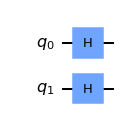

In [ ]:
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(2)
print("Initial StateVector  = " ,Statevector(qc))
qc.h([0,1])
print("After H gate StateVector  = " ,Statevector(qc))
qc.draw('mpl')

Statevector에 4개의 값이 존재하는 것을 볼 수 있는데 이는 qubit이 존재할 수 있는
각 state들을 나타낸다.
+) 1개의 qubit은 0 or 1 (2^1), 2개의 qubit은 00 or 01 or 10 or 11 (2^2)
n개의 qubit (2^n)개의 state를 가질 수 있다.
Initial StateVector의 경우 0번째 항이 1로 state가 정해져 있다.
그러나 H gate를 통과하고 나서인 After H gate StateVector를 보면 각 항이 0.5로 4개의 state 모두 존재 할 수 있고 Statevector의 크기이자 확률은 제곱해서 계산해보면 1로 유지된다.

### What is H Gate?
H Gate 는 Quantum Circuit 뿐만 아니라 Quantum Computing에서 매우 중요한 gate로 Hadamard Gate의 약자이다.


\[H =\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}\]

이해를 돕기 위하여 처음에는 그래프를 통해 표현하고 다음은 수식을 직접 계산해서 확인해보자.

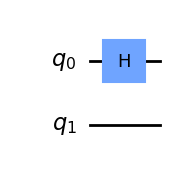

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

qc = QuantumCircuit(2)
qc.h(0)
qc.draw('mpl')

그래프를 보면 q_0만 H gate를 통과했고 q_1는 initial state 그대로이다.

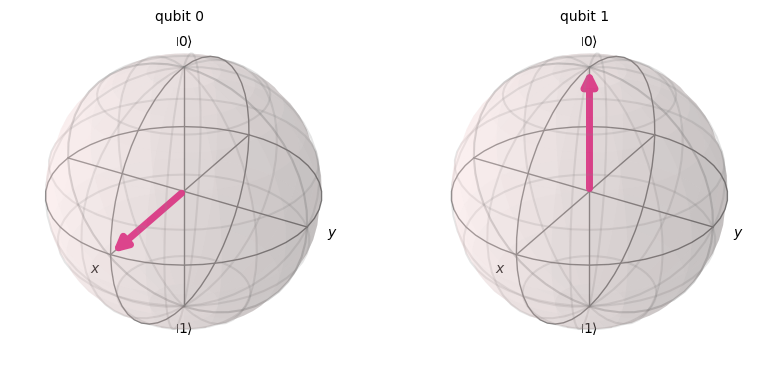

In [ ]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

bloch sphere로 표현한 결과이다.
qubit 1을 보면 statevector 가 initial state (1 0) 를 가리키고 있다.
single qubit은 state 0 or state 1 두 state를 가질 수 있는데
state 0 = (1 0) , state 1 = (0 1) 로 나타낸다.
state 1의 경우 z축 아래를 가리킨다.
H gate를 통과한 qubit 0를 보면 state 0도, state 1도 아닌 x축을 가리키고 있다.
이는 직접 Matrix를 계산하면 납득할 수 있다.


\frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}\begin{pmatrix} 1\\0\end{pmatrix}

In [ ]:
import numpy as np
from math import sqrt
H = (1/sqrt(2))*np.array([[1,1],[1,-1]])
init = np.array([1,0])
result = H.dot(init)
result

array([0.70710678, 0.70710678])

numpy를 이용하여 계산한 결과 1/sqrt(2)(1, 1) = 1/sqrt(2){(1,0)+(0,1}로
qubit 이 두 state가 중첩(superposition)된 상태로 존재함을 알 수 있다.

## 2. 중첩된 상태 |s> 에서 oracle을 통해 원하는 input |w>를 negative phase로 만들기


실제로는 oracle 내부에서 어떠한 처리가 일어나는지는 알 수 없으나 예시에서는 원하는 input state를 output으로 탐색하기 위해서 직접 oracle을 설계한다.
원하는 input state |w> =|10> = |2> = (0,0,1,0)

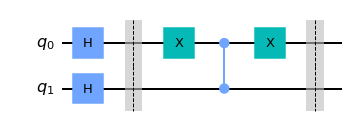

In [ ]:
import qiskit
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h([0,1])  # superposition
qc.barrier()
qc.x(0)      # Oracle
qc.cz(0,1)
qc.x(0)
qc.barrier()
qc.draw('mpl')

#### n = 2 인 경우 원하는 input state를 4 가지를 설정할 수 있는데
#### 원하는 input state에 따라 oracle 내부 gate 구조가 달라지게 된다.
#### 수식 계산를 통해 원하는 input state가 추출되는지 확인하였고
#### mpl로 나타낸 algorithm의 논리 회로를 따라가면서 추출되는지도 확인하였다.

X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix},

CZ = \begin{pmatrix}1 & 0 & 0 & 0 \\ 0& 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1\end{pmatrix}


outer = outer product

### 추후 matrix 과정도 첨부할 예정

### If w = 0

In [ ]:
# if w = 0, oracle matrix?
# (XouterX)CZ(XouterX))|s>

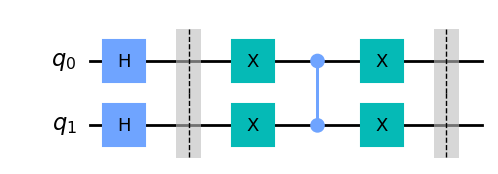

In [ ]:
import qiskit
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h([0,1])  # superposition
qc.barrier()
qc.x([0,1])      # Oracle
qc.cz(0,1)
qc.x([0,1])
qc.barrier()
qc.draw('mpl')

In [ ]:
state = Statevector.from_instruction(qc)
state

Statevector([-0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j],
            dims=(2, 2))


### If w = 1

In [ ]:
# if w = 1, oracle matrix?
# (IouterX)CZ(IouterX))|s>

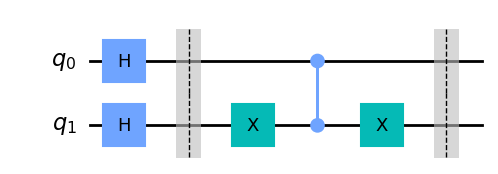

In [ ]:
import qiskit
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h([0,1])  # superposition
qc.barrier()
qc.x(1)      # Oracle
qc.cz(0,1)
qc.x(1)
qc.barrier()
qc.draw('mpl')

In [ ]:
state = Statevector.from_instruction(qc)
state

Statevector([ 0.5+0.j, -0.5+0.j,  0.5+0.j,  0.5+0.j],
            dims=(2, 2))


### If w = 2

In [ ]:
# if w = 2, oracle matrix?
# (XouterI)CZ(XouterI))|s>

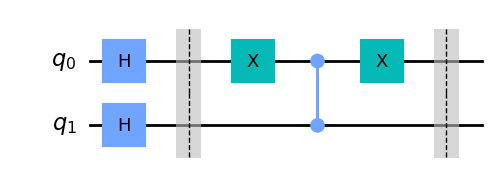

In [ ]:
import qiskit
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h([0,1])  # superposition
qc.barrier()
qc.x(0)      # Oracle
qc.cz(0,1)
qc.x(0)
qc.barrier()
qc.draw('mpl')

In [ ]:
state = Statevector.from_instruction(qc)
state

Statevector([ 0.5+0.j,  0.5+0.j, -0.5+0.j,  0.5+0.j],
            dims=(2, 2))


### If w = 3

In [ ]:
# if w = 3, oracle matrix?
# CZ|s>

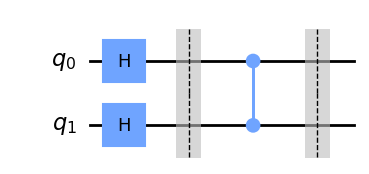

In [ ]:
import qiskit
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h([0,1])  # superposition
qc.barrier()
qc.cz(0,1) # Oracle
qc.barrier()
qc.draw('mpl')

In [ ]:
state = Statevector.from_instruction(qc)
state

Statevector([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j],
            dims=(2, 2))


# -----------------------------------------------------------------

##### single qubit의 경우 바로바로 각 gate에 따른 matrix를 계산하면 됐었는데  n>=2 인 경우 어떤 qubit을 먼저 계산해야할까?
바로 결론을 말하자면 동시에 계산한다.
Grover's Algorithm을 공부하면서 크게 애먹은 과정 중 하나인데
위 그림에서 initial state의 two qubit가 동시에 H gate를 지나는데 이는
initial state (1,0,0,0) 에 H^2 matrix를 곱하면 된다.
편의상 H^2라고 표현했는데 이는 H outer product H 이다.
H outer product H = 1/2 \begin{pmatrix} 1 & 1 & 1& 1 \\ 1 & -1 & 1 & -1 \\1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1 \end{pmatrix} 이다.

또한 H^2 를 지나면 1X4 vector인데 X gate 는 2X2라서 어떻게 계산해야할지 곤란하였는데 q1에 Identity Matrix가 숨겨져 있어서 I outer product X

{\mathbf{I} \otimes \mathbf{X} }= \begin{pmatrix} 0 & 1 & 0& 0 \\ 1 & 0 & 0 & 0 \\0 & 0 & 0 & 1 \\ 0 & 0 & 1 &0 \end{pmatrix} 가 된다.

따라서 initial state부터 oracle 까지의 matrix 연산은 다음과 같다.
(IxX)CZ(IxX)H^2|0>
wolframalpha를 통해 계산한 결과
1/2(1,1,-1,1)로 원하는 값의 phase를 뒤집을 수 있었다.

* 추후 matrix 추가 예정

desire state = w = (0,0,1,0) 의 경우 H gate와 oracle을 지난 결과
state를  보면 1/2(1,1,-1,1)로 state에서 w 만 phase가 negative가 됨을 확인할 수 있다.

## 3. Diffusion Operator를 통하여 desire input w 확률 증폭

Diffusion Operator의 경우 처음 중첩된 state |s>를 기준으로 state를 뒤집게 된다.
Diffusion Operator는 지금까지 공부한 바로는 2가지 방법으로 구현할 수 있다

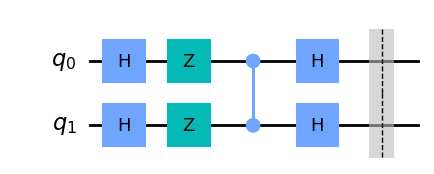

In [4]:
import qiskit
from qiskit import QuantumCircuit

n = 2

ga = QuantumCircuit(n)

ga.h([0,1]) # Diffusion operator
ga.z([0,1])
ga.cz(0,1)
ga.h([0,1])
ga.barrier()

ga.draw('mpl')

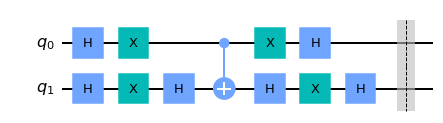

In [ ]:
n = 2

ga = QuantumCircuit(n)

ga.h([0,1]) # Diffusion operator
ga.x([0,1])
ga.h(1)
ga.cx(0,1)
ga.h(1)
ga.x([0,1])
ga.h([0,1])
ga.barrier()

ga.draw('mpl')

#### 다만 두번째 Diffusion Operator의 경우 Global Phase = pi 로 혼동할 수 있어서 첫번째 Diffusion Operator를 사용하겠다.

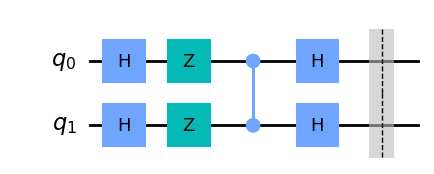

In [3]:
import qiskit
from qiskit import QuantumCircuit

n = 2

ga = QuantumCircuit(n)

ga.h([0,1]) # Diffusion operator
ga.z([0,1])
ga.cz(0,1)
ga.h([0,1])
ga.barrier()

ga.draw('mpl')

Diffusion Operator U_s는 식으로 나타내면 2|s><s|-I 로 나타낼 수 있는데
이는 input된 벡터를 |s> state를 기준으로 mirror reflect하는 operator 이다.
U_s를 더 자세히 뜯어보면 이는 H(2|0><0|-I)H 로 표현할 수 있는데
이를 간단히 표현하면 HU_0H 이다.
여기서 U_0은 |0> state를 기준으로 mirror reflection을 취하는 Operator이다.
U_0에 좌우로 H를 곱한 것으로 나타낼 수 있는 이유는 |s> = H|0> 이기 때문이다. 양변에 dagger(conjugate & transpose)를 취하면
<s| = <0|H 이다. H의 경우 dagger를 취해도 자기 자신인 unitary이다.
따라서 H(2|0><0|-I)H = 2H|0><0|H-HIH = 2|s><s|-I 이다.
Quantum gate를 통해 U_0를 나타내는 방법은 Z*CZ이다.
직접 행렬 계산을 해보면 다음과 같다.

In [6]:
import numpy as np

Z = np.array([[1,0,0,0]
              ,[0,-1,0,0]
              ,[0,0,-1,0]
              ,[0,0,0,1]])
CZ = np.array([[1,0,0,0]
               ,[0,1,0,0]
               ,[0,0,1,0]
               ,[0,0,0,-1]])
U_0 = Z.dot(CZ)
U_0

array([[ 1,  0,  0,  0],
       [ 0, -1,  0,  0],
       [ 0,  0, -1,  0],
       [ 0,  0,  0, -1]])

이는 |0>를 기준으로 input vector를 mirror reflect 하는 operator로 한번 확인해보겠다.

In [10]:
# w = (0,0,1,0)
Ufs=np.array([0.5,0.5,-0.5,0.5])
print(U_0.dot(Ufs))

[ 0.5 -0.5  0.5 -0.5]


|0> =(1,0,0,0) 을 기준으로 값들이 mirror reflect 되어 0번째 항을 제외한 나머지 항들의 sign이 전부 negative가 곱해짐을 확인 할 수 있다.

이어서 U_s = HU_0H임을 확인해보고 대입해보자.

In [11]:
H = (1/2)*np.array([[1,1,1,1]
                   ,[1,-1,1,-1]
                   ,[1,1,-1,-1]
                   ,[1,-1,-1,1]])
U_s = (H.dot(U_0)).dot(H)
U_s

U_s.dot(Ufs)

array([0., 0., 1., 0.])

위쪽의 코드에서 desired input state |w> = (0,0,1,0) 라고 가정하여 Uf 를 지난 state Ufs를 Us에 대입하였는데 (0,0,1,0) 으로 desired state |w>가 출력됨을 확인할 수 있었다.
본 설명에서는 n = 2 인 상황을 가정하여 설명하였는데
실제로는 n이 큰 상황에서 Algorithm을 실행하게 된다.
그럴경우 oracle Uf 와 Diffuser Us를 sqrt(N=2^n) 번 반복하여 원하는 input을 1에 가깝게 증폭하고, 다른 state들은 0에 수렴하게 만든 다음 측정을 하게 된다.
